In [9]:
import pandas as pd
df = pd.read_csv('/content/Bengaluru_House_Data (3).csv')
print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
missing_values_society = df['society'].isnull().sum()
datatype_society = df['society'].dtype
unique_values_society = df['society'].nunique()
percentage_missing_society = (missing_values_society / len(df)) * 100

print(f"Total missing values in 'society' column: {missing_values_society}")
print(f"Data type of 'society' column: {datatype_society}")
print(f"Number of unique values in 'society' column: {unique_values_society}")
print(f"Percentage of missing values in 'society' column: {percentage_missing_society:.2f}%")

Total missing values in 'society' column: 5502
Data type of 'society' column: object
Number of unique values in 'society' column: 2688
Percentage of missing values in 'society' column: 41.31%


In [11]:
df_cleaned = df.drop('society', axis=1)
print("The 'society' column has been dropped. Displaying the first 5 rows of the modified DataFrame:")
df_cleaned.head()

The 'society' column has been dropped. Displaying the first 5 rows of the modified DataFrame:


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
price_description = df_cleaned['price'].describe()
print("Descriptive statistics for 'price' column:")
print(price_description)

Descriptive statistics for 'price' column:
count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


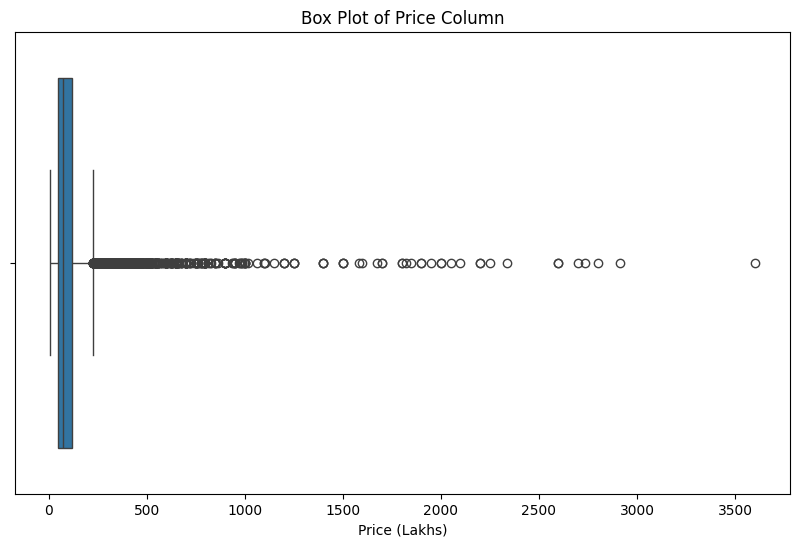

Box plot of 'price' column displayed to visualize its distribution and potential outliers.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['price'])
plt.title('Box Plot of Price Column')
plt.xlabel('Price (Lakhs)')
plt.show()
print("Box plot of 'price' column displayed to visualize its distribution and potential outliers.")

In [14]:
Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Q1 (25th percentile): 50.0
Q3 (75th percentile): 120.0
IQR (Interquartile Range): 70.0
Lower bound for outliers: -55.0
Upper bound for outliers: 225.0


In [15]:
outliers = df_cleaned[(df_cleaned['price'] < lower_bound) | (df_cleaned['price'] > upper_bound)]
num_outliers = len(outliers)

print(f"Number of outliers in 'price' column: {num_outliers}")
print("First 5 rows of identified outliers:")
print(outliers.head())

Number of outliers in 'price' column: 1276
First 5 rows of identified outliers:
               area_type   availability               location       size  \
7   Super built-up  Area  Ready To Move           Rajaji Nagar      4 BHK   
9             Plot  Area  Ready To Move           Gandhi Bazar  6 Bedroom   
11            Plot  Area  Ready To Move             Whitefield  4 Bedroom   
18  Super built-up  Area  Ready To Move  Ramakrishnappa Layout      3 BHK   
22            Plot  Area  Ready To Move            Thanisandra  4 Bedroom   

   total_sqft  bath  balcony  price  
7        3300   4.0      NaN  600.0  
9        1020   6.0      NaN  370.0  
11       2785   5.0      3.0  295.0  
18       2770   4.0      2.0  290.0  
22       2800   5.0      2.0  380.0  


In [16]:
df_no_outliers = df_cleaned[~((df_cleaned['price'] < lower_bound) | (df_cleaned['price'] > upper_bound))]

initial_rows = len(df_cleaned)
rows_after_outlier_removal = len(df_no_outliers)
rows_dropped_price = initial_rows - rows_after_outlier_removal

print(f"Initial number of rows (after dropping 'society' column): {initial_rows}")
print(f"Number of rows after removing price outliers: {rows_after_outlier_removal}")
print(f"Number of rows dropped due to price outliers: {rows_dropped_price}")
print("Displaying the first 5 rows of the DataFrame after removing price outliers:")
df_no_outliers.head()

Initial number of rows (after dropping 'society' column): 13320
Number of rows after removing price outliers: 12044
Number of rows dropped due to price outliers: 1276
Displaying the first 5 rows of the DataFrame after removing price outliers:


,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
